## We have seen the following aspects of Data :
* Data Collection
* Data Storage
* Data Manipulation
* Data Cleaning

### Let's more to the next level where we visualize the rather boring set of numbers!
![visualize](img/DataViz.PNG)

## Why the need of Data Visualization?
* Old saying : A picture speaks a thousand words
* It is crucial to know the shape of data, treat outliers etc.Visualization helps seeing the anomalies.
* In Data Science, we are always on a look out for trends or patterns
* Correlations are one of the most fundamental aspects of Data Science and finding them is easiest when visualized
* Visualizations are plain fun!

## Let's answer few IPL 2018 questions via Visualization
* Top 10 matches with highest scores


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

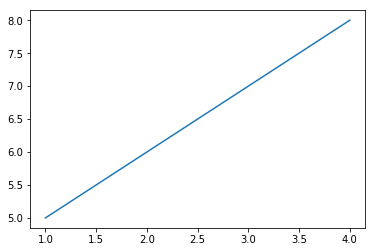

In [19]:
#plt.plot(x,y)
plt.plot([1,2,3,4],[5,6,7,8])
plt.show()

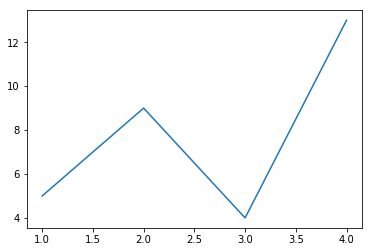

In [21]:
#plt.plot(x,y) ==> supplied separately
x = [1,2,3,4]
y = [5,9,4,13]
plt.plot(x,y)
plt.show()

In [2]:
## top 10 matches with highest scores
df = pd.read_csv('data/iplfinal.csv',sep='|')
df.head()

,match_description,match_date,match_venue,match_location,match_result,team_name,innings_order,batsman_name,dismissal_mode,runs,balls,fours,sixes
0,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Rohit Sharma (c),c Rayudu b Watson,15,18,1,1
1,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Evin Lewis,lbw b D Chahar,0,2,0,0
2,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Ishan Kishan (wk),c Mark Wood b Tahir,40,29,4,1
3,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Suryakumar Yadav,c Harbhajan b Watson,43,29,6,1
4,"Mumbai Indians vs Chennai Super Kings, 1st Mat...",2018-04-07,"Wankhede Stadium,",Mumbai,Chennai Super Kings won by 1 wkt,Mumbai Indians Innings,innings_1,Hardik Pandya,not out,22,20,2,0


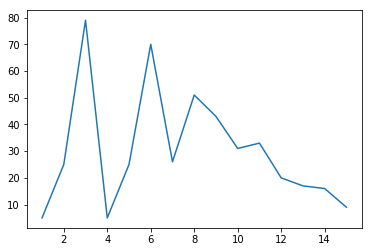

In [43]:
#let's see dhoni's performance match by match

y = df[df['batsman_name'].str.contains('Dhoni')].runs
x = np.arange(1,len(y)+1)
plt.plot(x,y)
plt.show()
#z = y.runs/y.balls

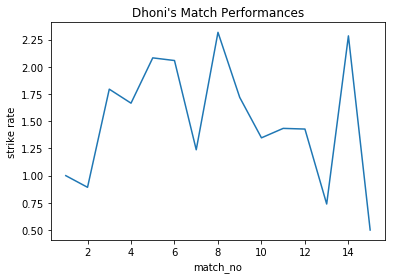

In [51]:
#let's see dhoni's performance match by match

y = df[df['batsman_name'].str.contains('Dhoni')]
z = y.runs/y.balls
x = np.arange(1,len(z)+1)
plt.plot(x,z)
plt.title('Dhoni\'s Match Performances')
plt.xlabel('match_no')
plt.ylabel('strike rate')
plt.show()
#z = y.runs/y.balls

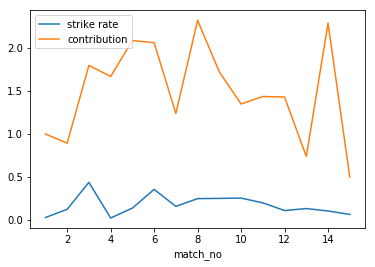

In [133]:
#compare dhoni's match contribution against his strike rate
df.head()
a = df[df.batsman_name.str.contains('Dhoni')]
b = df[df.team_name.str.contains('Chennai')].groupby('match_description',as_index=False)
c = b[['runs']].sum()
d = pd.merge(a,c,on='match_description')
# calculate the match-wise contribution of Dhoni
e = d.runs_x/d.runs_y
# calculate the match-wise strike rate of Dhoni
f = a.runs/a.balls
# create common x-axis values
g = np.arange(1,len(f)+1)
plt.plot(g,e,label='strike rate')
plt.plot(g,f,label='contribution')
plt.xlabel('match_no')
plt.legend()
plt.show()

In [135]:
# grp = df.groupby('match_description')
a = df.groupby('match_location')
b = a.runs.agg(np.sum)
b.index()

TypeError: 'Index' object is not callable